# 🧬 Breast Cancer Dataset - Principal Component Analysis (PCA)

This project demonstrates the use of **Principal Component Analysis (PCA)** to reduce the dimensionality of the breast cancer dataset while preserving essential variance for visualization and interpretation.

## 📌 Objectives

- Standardize the dataset
- Reduce dimensionality from 30 features to 2 principal components
- Visualize variance and feature contributions to the components

## 🔧 Technologies Used

- Python  
- Pandas, NumPy  
- Matplotlib, Seaborn  
- Scikit-learn

## 🔍 Key Steps

1. **Load Dataset**  
   Breast cancer dataset is loaded directly from `sklearn.datasets`.

2. **Data Preprocessing**  
   - Converted data to a DataFrame  
   - Standardized features using `StandardScaler`

3. **Apply PCA**  
   - Reduced features from 30 to 2 components  
   - Visualized the new data in 2D space  
   - Examined feature weights in each principal component

4. **Visualization**  
   - Scatter plot of PCA components by class  
   - Heatmap showing contributions of features to each component

## ▶️ How to Run

1. Install required libraries:
   ```bash
   pip install pandas numpy matplotlib seaborn scikit-learn
   ```

2. Run the Python script or Jupyter Notebook

In [1]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
# Load built-in breast cancer dataset
from sklearn.datasets import load_breast_cancer

In [3]:
# create an instance of dataset
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# Create DataFrame from the dataset features
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Standardize the features for PCA
from sklearn.preprocessing import StandardScaler

In [8]:
scalar = StandardScaler()

In [9]:
scalar.fit(df)

StandardScaler()

In [10]:
scaled_data = scalar.transform(df)

In [11]:
# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Display the first few rows
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Principal Component Analysis

In [12]:
# Apply PCA to reduce dimensionality to 2 components
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_data)

In [16]:
# Check original 
scaled_data.shape

(569, 30)

In [17]:
# reduced shape
x_pca.shape

(569, 2)

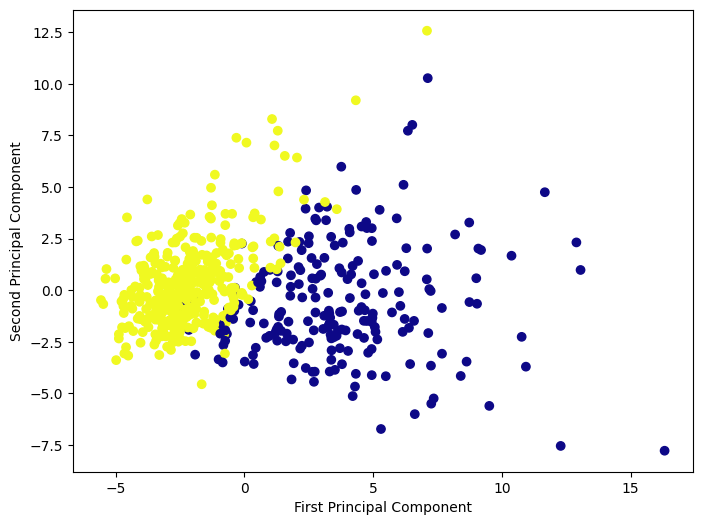

In [18]:
# Visualize the data projected onto the first two principal components
plt.figure(figsize=(8,6 ))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [19]:
# Examine the principal components (eigenvectors)
# Each row in pca.components_ corresponds to one principal component,
# and each column shows the weight/importance of original features
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [20]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

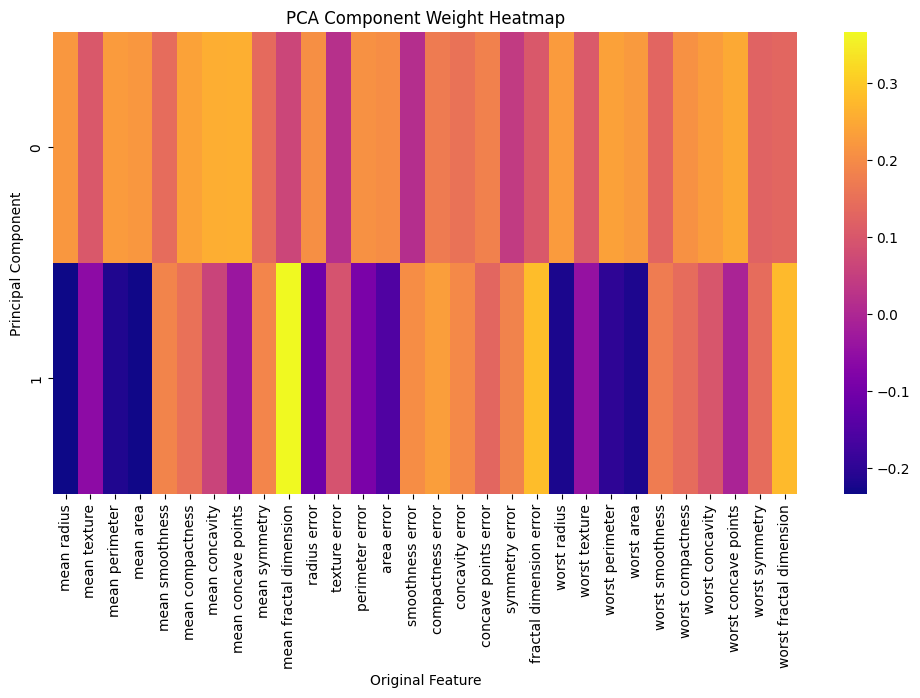

In [21]:
# Visualize the weight of each original feature in the principal components
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap='plasma')
plt.title('PCA Component Weight Heatmap')
plt.xlabel('Original Feature')
plt.ylabel('Principal Component')
plt.show()